In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
colors = ['#F7941D', '#00b9f2', '#00a875', '#ecde38']
sex = ['#0072bc', '#da6fab']
sns.set_palette(sns.color_palette(colors))

In [13]:
all_samples = pd.read_csv('../raw_data/perSample_allChains_aditionalPhenotypes.csv')
all_samples = all_samples.rename(columns={' nCDR3_IGH': 'nCDR3_IGH'})
all_samples = all_samples.loc[:,['File_Name', 'histological site', 'nCDR3_IGH', 'sex_s',
                                 'submitted_subject_id_s', 'MBases_l', 'total_reads', 'nCDR3_IGH_per_Mreads']]
all_samples.head()

,File_Name,histological site,nCDR3_IGH,sex_s,submitted_subject_id_s,MBases_l,total_reads,nCDR3_IGH_per_Mreads
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,1,male,GTEX-SNMC,4045,NaN,NaN
1,G64389.GTEX-13SLW-0326.1,Muscle,1,male,GTEX-13SLW,4744,NaN,NaN
2,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,637,male,GTEX-SIU7,8434,NaN,NaN
3,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Blood Vessel,0,female,GTEX-OXRK,6962,NaN,NaN
4,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain,0,female,GTEX-T2IS,10465,NaN,NaN


In [14]:
all_samples['total_reads'] = (all_samples['MBases_l'])/76
all_samples['nCDR3_IGH_per_Mreads'] = all_samples['nCDR3_IGH']/all_samples['total_reads']
all_samples.head()

,File_Name,histological site,nCDR3_IGH,sex_s,submitted_subject_id_s,MBases_l,total_reads,nCDR3_IGH_per_Mreads
0,G35168.GTEX-SNMC-0826-SM-4DM66.1,Bladder,1,male,GTEX-SNMC,4045,53.223684,0.018789
1,G64389.GTEX-13SLW-0326.1,Muscle,1,male,GTEX-13SLW,4744,62.421053,0.016020
2,G26533.GTEX-SIU7-0526-SM-3NM8I.1,Lung,637,male,GTEX-SIU7,8434,110.973684,5.740100
3,G18060.GTEX-OXRK-0526-SM-2YUMW.1,Blood Vessel,0,female,GTEX-OXRK,6962,91.605263,0.000000
4,G21054.GTEX-T2IS-0011-R5A-SM-32QP4.1,Brain,0,female,GTEX-T2IS,10465,137.697368,0.000000


In [15]:
df=pd.read_csv('../raw_data/hashimotos_data.csv')
df=df.loc[df['type'] != 'focal']
df.head()

,submitted_subject_id_s,n_cdr3_IGH,flag,note,type
0,GTEX-YFC4,5621,1,late stage hashimotos,hashimotos
1,GTEX-14BMU,5260,1,diff hashimotos,hashimotos
2,GTEX-11XUK,4435,1,mod degree of hashimotos,hashimotos
3,GTEX-S4UY,3581,1,diff hashimotos,hashimotos
4,GTEX-144FL,3540,1,? autolysis,hashimotos


In [16]:
all_tmp = all_samples.groupby('submitted_subject_id_s')['total_reads'].sum().reset_index()
all_tmp.head()

,submitted_subject_id_s,total_reads
0,GTEX-1117F,438.092105
1,GTEX-111CU,430.592105
2,GTEX-111FC,388.105263
3,GTEX-111VG,543.921053
4,GTEX-111YS,678.986842


In [17]:
df_plot = pd.merge(df, all_tmp, on='submitted_subject_id_s')
df_plot['n_cdr3_IGH_per_M'] = df_plot['n_cdr3_IGH']/df_plot['total_reads']
df_plot.to_csv('../summary_data/Figure6a_data.csv')
df_plot

,submitted_subject_id_s,n_cdr3_IGH,flag,note,type,total_reads,n_cdr3_IGH_per_M
0,GTEX-YFC4,5621,1,late stage hashimotos,hashimotos,2154.000000,2.609564
1,GTEX-14BMU,5260,1,diff hashimotos,hashimotos,928.973684,5.662163
2,GTEX-11XUK,4435,1,mod degree of hashimotos,hashimotos,757.381579,5.855701
3,GTEX-S4UY,3581,1,diff hashimotos,hashimotos,1269.828947,2.820065
4,GTEX-144FL,3540,1,? autolysis,hashimotos,580.960526,6.093357
5,GTEX-OHPL,3453,1,hashimotos,hashimotos,1803.342105,1.914778
6,GTEX-13NYB,2872,0,na,None,1132.328947,2.536365
7,GTEX-W5WG,2589,1,early hashimotos,early,1581.000000,1.637571
8,GTEX-139UW,1949,1,possible early hashimotos,early,451.644737,4.315339
9,GTEX-S4Q7,1462,1,diff hashimotos,hashimotos,1645.105263,0.888697


# Figure 6a

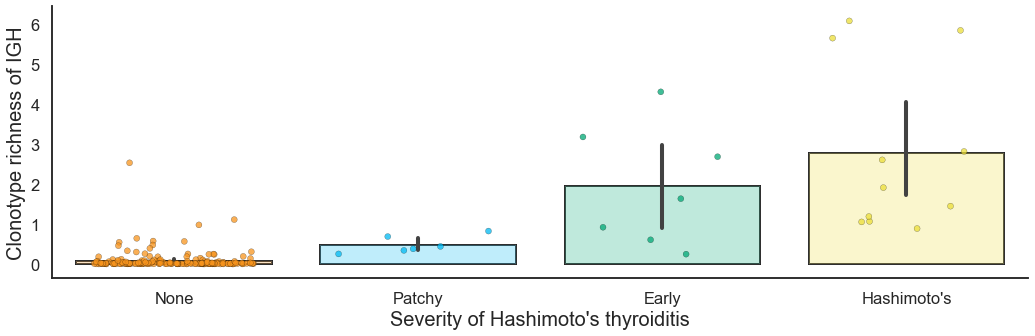

In [126]:
plt.figure(figsize=(17.5,5))
sns.set_style("white")
sns.set_context("talk")
g=sns.barplot(x="type", y="n_cdr3_IGH_per_M", data = df_plot, edgecolor='black', linewidth=2, color='white',
              order=['None','patchy','early',' hashimotos'], saturation=1, estimator=np.mean, ci=None)
sns.barplot(x="type", y="n_cdr3_IGH_per_M", data = df_plot, alpha=.25,
              order=['None','patchy','early',' hashimotos'], saturation=1, estimator=np.mean, ci=95)
sns.stripplot(x="type", y="n_cdr3_IGH_per_M", data = df_plot, order=['None','patchy','early',' hashimotos'], 
              jitter=.33, size=6, edgecolor='black', linewidth=.25, alpha=.75)

g.set(xlabel='Severity of Hashimoto\'s thyroiditis', ylabel='Clonotype richness of IGH')
g.set_xticklabels(labels=['None', 'Patchy', 'Early', 'Hashimoto\'s'])
g.xaxis.label.set_size(20)
g.yaxis.label.set_size(20)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-1, 1)
g=sns.despine()
plt.savefig("../figures/Figure6_a.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure6_a.png", bbox_inches='tight')

In [127]:
df.groupby(['type']).count()

,submitted_subject_id_s,n_cdr3_IGH,flag,note
type,,,,
hashimotos,11,11,11,11
None,180,180,180,180
early,7,7,7,7
patchy,6,6,6,6


In [128]:
print (stats.ttest_ind(df_plot.loc[df_plot['type'] == 'None']['n_cdr3_IGH_per_M'],
                       df_plot.loc[df_plot['type'] == 'patchy']['n_cdr3_IGH_per_M']))
print (stats.ttest_ind(df_plot.loc[df_plot['type'] == 'None']['n_cdr3_IGH_per_M'],
                       df_plot.loc[df_plot['type'] == 'early']['n_cdr3_IGH_per_M']))
print (stats.ttest_ind(df_plot.loc[df_plot['type'] == 'None']['n_cdr3_IGH_per_M'],
                       df_plot.loc[df_plot['type'] == ' hashimotos']['n_cdr3_IGH_per_M']))

print ("---")
print (stats.ttest_ind(df_plot.loc[df_plot['type'] == 'patchy']['n_cdr3_IGH_per_M'],
                       df_plot.loc[df_plot['type'] == 'early']['n_cdr3_IGH_per_M']))
print (stats.ttest_ind(df_plot.loc[df_plot['type'] == 'patchy']['n_cdr3_IGH_per_M'],
                       df_plot.loc[df_plot['type'] == ' hashimotos']['n_cdr3_IGH_per_M']))

print ("---")
print (stats.ttest_ind(df_plot.loc[df_plot['type'] == 'early']['n_cdr3_IGH_per_M'],
                       df_plot.loc[df_plot['type'] == ' hashimotos']['n_cdr3_IGH_per_M']))


Ttest_indResult(statistic=-4.060085814119782, pvalue=7.249091695463942e-05)
Ttest_indResult(statistic=-13.438084624659513, pvalue=3.5962674524684705e-29)
Ttest_indResult(statistic=-16.309693166025934, pvalue=6.623852164567996e-38)
---
Ttest_indResult(statistic=-2.3375004101031167, pvalue=0.03934534819196806)
Ttest_indResult(statistic=-2.653387501997078, pvalue=0.018068627144194233)
---
Ttest_indResult(statistic=-0.9212826383008487, pvalue=0.3705862319990577)


In [9]:
fm_df = all_samples.loc[all_samples['histological site'] == 'Breast',:].reset_index(drop=True)
fm_df.to_csv('../summary_data/Figure6b_data.csv')
fm_group = fm_df.groupby(by='sex_s')['histological site'].count()
fm_group

sex_s
female    55
male      73
Name: histological site, dtype: int64

In [130]:
fm_df.head()

,File_Name,histological site,nCDR3_IGH,sex_s,submitted_subject_id_s,MBases_l,total_reads,nCDR3_IGH_per_Mreads
0,G32434.GTEX-QVJO-1826-SM-447C9.2,Breast,22,female,GTEX-QVJO,4283,56.355263,0.390381
1,G34301.GTEX-XMD1-0826-SM-4AT52.2,Breast,42,male,GTEX-XMD1,6016,79.157895,0.530585
2,G26618.GTEX-WYVS-1726-SM-3NMAY.1,Breast,3285,female,GTEX-WYVS,8817,116.013158,28.315754
3,G61187.GTEX-YJ8O-2226.3,Breast,12,female,GTEX-YJ8O,6730,88.552632,0.135513
4,G33697.GTEX-REY6-2426-SM-48FF5.4,Breast,6,male,GTEX-REY6,6837,89.960526,0.066696


# Figure 6b

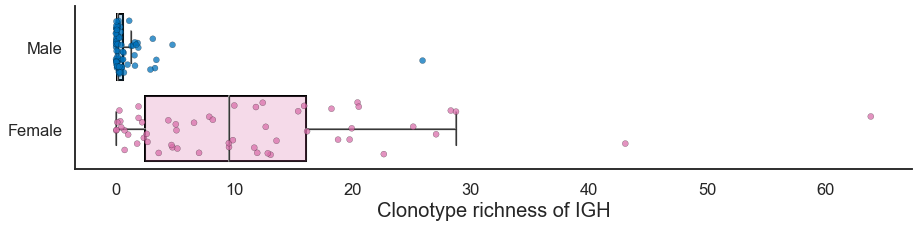

In [131]:
plt.figure(figsize=(15,3))
sns.set_style("white")
sns.set_context("talk")
g=sns.boxplot(x="nCDR3_IGH_per_Mreads", y="sex_s", data = fm_df, order=['male', 'female'], saturation=1, 
              linewidth=2, fliersize=0, color='white', boxprops=dict(edgecolor='black'))
sns.boxplot(x="nCDR3_IGH_per_Mreads", y="sex_s", data = fm_df, order=['male', 'female'], saturation=1, palette=sex, 
              linewidth=1.25, fliersize=0, boxprops=dict(alpha=.25))
sns.stripplot(x="nCDR3_IGH_per_Mreads", y="sex_s", data = fm_df, order=['male', 'female'], jitter=.33, size=6, palette=sex,
              edgecolor='black', linewidth=.25, alpha=.75)
g.set(xlabel='Clonotype richness of IGH', ylabel='')
g.set_yticklabels(labels=['Male', 'Female'])
g.xaxis.label.set_size(20)
g.yaxis.label.set_size(20)

sns.despine()
plt.savefig("../figures/Figure6_b.pdf", bbox_inches='tight')
plt.savefig("../figures/Figure6_b.png", bbox_inches='tight')

In [132]:
tmp = all_samples[all_samples['sex_s'] == 'male']
tmp = tmp.loc[tmp['histological site'] == 'Breast', ['File_Name', 'nCDR3_IGH_per_Mreads']]
tmp.sort_values(by='nCDR3_IGH_per_Mreads', ascending=False).head()
# G62523.GTEX-ZVE2-1226.2

,File_Name,nCDR3_IGH_per_Mreads
3250,G62523.GTEX-ZVE2-1226.2,25.929232
1246,G32977.GTEX-XBED-1626-SM-47JYN.3,4.801251
5854,G60839.GTEX-139T8-0826.2,3.438914
1847,G35287.GTEX-U3ZH-1426-SM-4DXSR.7,3.322086
2706,G32368.GTEX-QEL4-2126-SM-447AE.2,3.137445


In [133]:
fm_df.groupby("sex_s").nCDR3_IGH_per_Mreads.describe().unstack()

       sex_s 
count  female    55.000000
       male      73.000000
mean   female    11.375076
       male       0.968426
std    female    11.736197
       male       3.110963
min    female     0.044104
       male       0.014772
25%    female     2.499336
       male       0.086378
50%    female     9.562571
       male       0.194767
75%    female    16.046344
       male       0.625882
max    female    63.797616
       male      25.929232
dtype: float64

In [134]:
stats.mannwhitneyu(fm_df.loc[fm_df['sex_s'] == 'male', 'nCDR3_IGH_per_Mreads'],
                   fm_df.loc[fm_df['sex_s'] == 'female', 'nCDR3_IGH_per_Mreads'],
                   alternative = 'two-sided')

MannwhitneyuResult(statistic=376.0, pvalue=4.13806691677215e-15)